In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_classification
import matplotlib
from matplotlib import style

In [2]:
# Matplotlib config
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
style.use('ggplot')

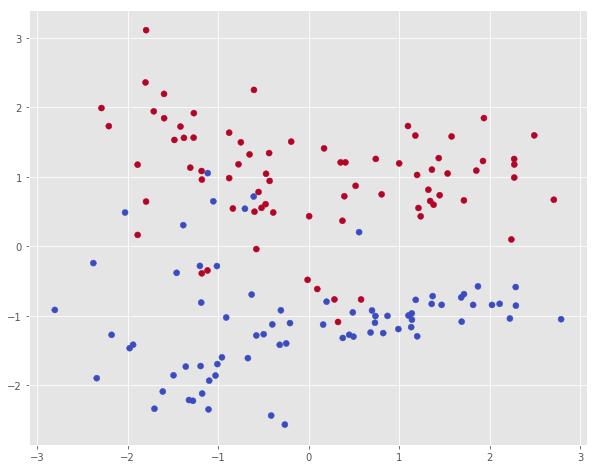

In [52]:
# Make toy dataset
x, y_ = make_classification(150, n_features=2, n_redundant=0)
# Plot the dataset
plt.scatter(x[:,0], x[:,1], c=y_, cmap=plt.cm.coolwarm)

# Make in to col vec
y = y_.reshape((150, 1))

In [48]:
# Decision Boundary
def plot_decision_boundary(pred_func, X):
    # Set min and max for padding
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    h = 0.01
    # Make a grid of points with h space between points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict value on whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the countour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    plt.scatter(x[:,0], x[:,1], c=y_, cmap=plt.cm.coolwarm)

0 1.23194
1000 0.27288
2000 0.251119
3000 0.246057
4000 0.244328
5000 0.243644
6000 0.243351
7000 0.24322
8000 0.243159
9000 0.243131
10000 0.243117

Accuracy:  0.9


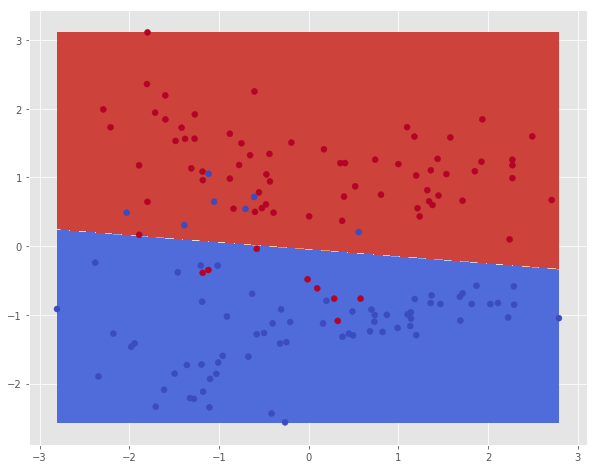

In [53]:
# Logistic Regression model
# Placeholders for data, none indicates the size of the dataset
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
# Weights and biases
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hyp = tf.sigmoid(tf.matmul(X,W) + b)

# Cost Function (cross entropy)
cost = -tf.reduce_mean(Y * tf.log(hyp) + (1 - Y) * tf.log(1 - hyp))

# Optimize the cost
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Prediction and Accuracy
predicted = tf.cast(hyp > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Start Session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Train 
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x, Y: y})
        # Print cost every 1000 steps
        if step % 1000 == 0:
            print(step, cost_val)

    # Accuracy
    h, c, a = sess.run([hyp, predicted, accuracy], feed_dict={X: x, Y: y})
    print("\nAccuracy: ", a)

    # Plot
    plot_decision_boundary(lambda x: sess.run(predicted, feed_dict={X: x}), x)
